# 19-2 Kaggle Study (bk)

[Web Traffic Time Series Forecasting](https://www.kaggle.com/c/web-traffic-time-series-forecasting)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates

%matplotlib inline

In [2]:
DATA_PATH = "../data/web-traffic-time-series-forecasting/"
KEY_1 = "key_1.csv"
KEY_2 = "key_2.csv"
SAMPLE_SUBMISSION_1 = "sample_submission_1.csv"
SAMPLE_SUBMISSION_2 = "sample_submission_2.csv"
TRAIN_1 = "train_1.csv"
TRAIN_2 = "train_2.csv"

In [3]:
df_key_1 = pd.read_csv(
    DATA_PATH + KEY_1
)

In [4]:
df_key_1.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [5]:
len(df_key_1)

8703780

In [6]:
df_train_1 = pd.read_csv(
    DATA_PATH + TRAIN_1,
    index_col="Page"
).T

In [7]:
df_train_1.index = pd.to_datetime(df_train_1.index)
df_train_1.index.name = 'Date'

df_train_1 = df_train_1.fillna(df_train_1.mean())  # Filling missing data to mean value of columns
df_train_1 = df_train_1.dropna(axis=1)

In [8]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Columns: 144411 entries, 2NE1_zh.wikipedia.org_all-access_spider to Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider
dtypes: float64(144411)
memory usage: 606.0 MB


In [9]:
df_train_1.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,La_doña_(telenovela_de_2016)_es.wikipedia.org_all-access_spider,RTS_(canal_de_televisión)_es.wikipedia.org_all-access_spider,La_ley_del_corazón_es.wikipedia.org_all-access_spider,The_Crown_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,10.277992,12.0,19.691892,118.0,5.0,6.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-02,11.0,14.0,0.0,13.0,10.277992,7.0,19.691892,26.0,23.0,3.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-03,5.0,15.0,1.0,10.0,10.277992,4.0,19.691892,30.0,14.0,5.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-04,13.0,18.0,1.0,94.0,10.277992,5.0,19.691892,24.0,12.0,12.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-05,14.0,11.0,0.0,4.0,10.277992,20.0,19.691892,29.0,9.0,6.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333


In [10]:
df_train_1.tail()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,La_doña_(telenovela_de_2016)_es.wikipedia.org_all-access_spider,RTS_(canal_de_televisión)_es.wikipedia.org_all-access_spider,La_ley_del_corazón_es.wikipedia.org_all-access_spider,The_Crown_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-27,20.0,30.0,4.0,11.0,11.0,19.0,4.0,23.0,30.0,29.0,...,1.0,2.0,21.0,4.0,8.0,7.0,4.0,40.4375,7.0,12.0
2016-12-28,22.0,52.0,6.0,17.0,27.0,23.0,15.0,32.0,36.0,35.0,...,31.0,18.0,7.0,17.0,21.0,13.0,2.0,40.4375,7.0,13.0
2016-12-29,19.0,45.0,3.0,19.0,13.0,17.0,6.0,39.0,38.0,44.0,...,27.0,40.0,34.0,6.0,14.0,12.0,4.0,40.4375,7.0,3.0
2016-12-30,18.0,26.0,4.0,10.0,36.0,17.0,8.0,32.0,31.0,26.0,...,9.0,1.0,37.0,11.0,24.0,31.0,4.0,40.4375,7.0,5.0
2016-12-31,20.0,20.0,17.0,11.0,10.0,50.0,6.0,17.0,97.0,41.0,...,135.0,42.0,42.0,5.0,37.0,11.0,3.0,51.0000,7.0,10.0


## Visualization

In [11]:
idx = df_train_1.iloc[:, 0].index
data = df_train_1.iloc[:, 0]

In [12]:
data_list = [df_train_1.iloc[:, r] for r in range(10)]

In [13]:
def show_traffic(idx, data_list):
    rows_num = len(data_list)
    row_count = 0
    
    fig, ax_tuple = plt.subplots(
        nrows = rows_num,
        ncols = 1,
        figsize=(15, 3 * rows_num)
    )
    
    for ax in ax_tuple:
        ax.plot_date(
            x=idx,
            y=data_list[row_count],
            fmt='-'
        )
        
        ax.xaxis.set_major_locator(dates.MonthLocator())
        ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))

        ax.xaxis.grid(True)
        ax.yaxis.grid(True)
        
        row_count += 1

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


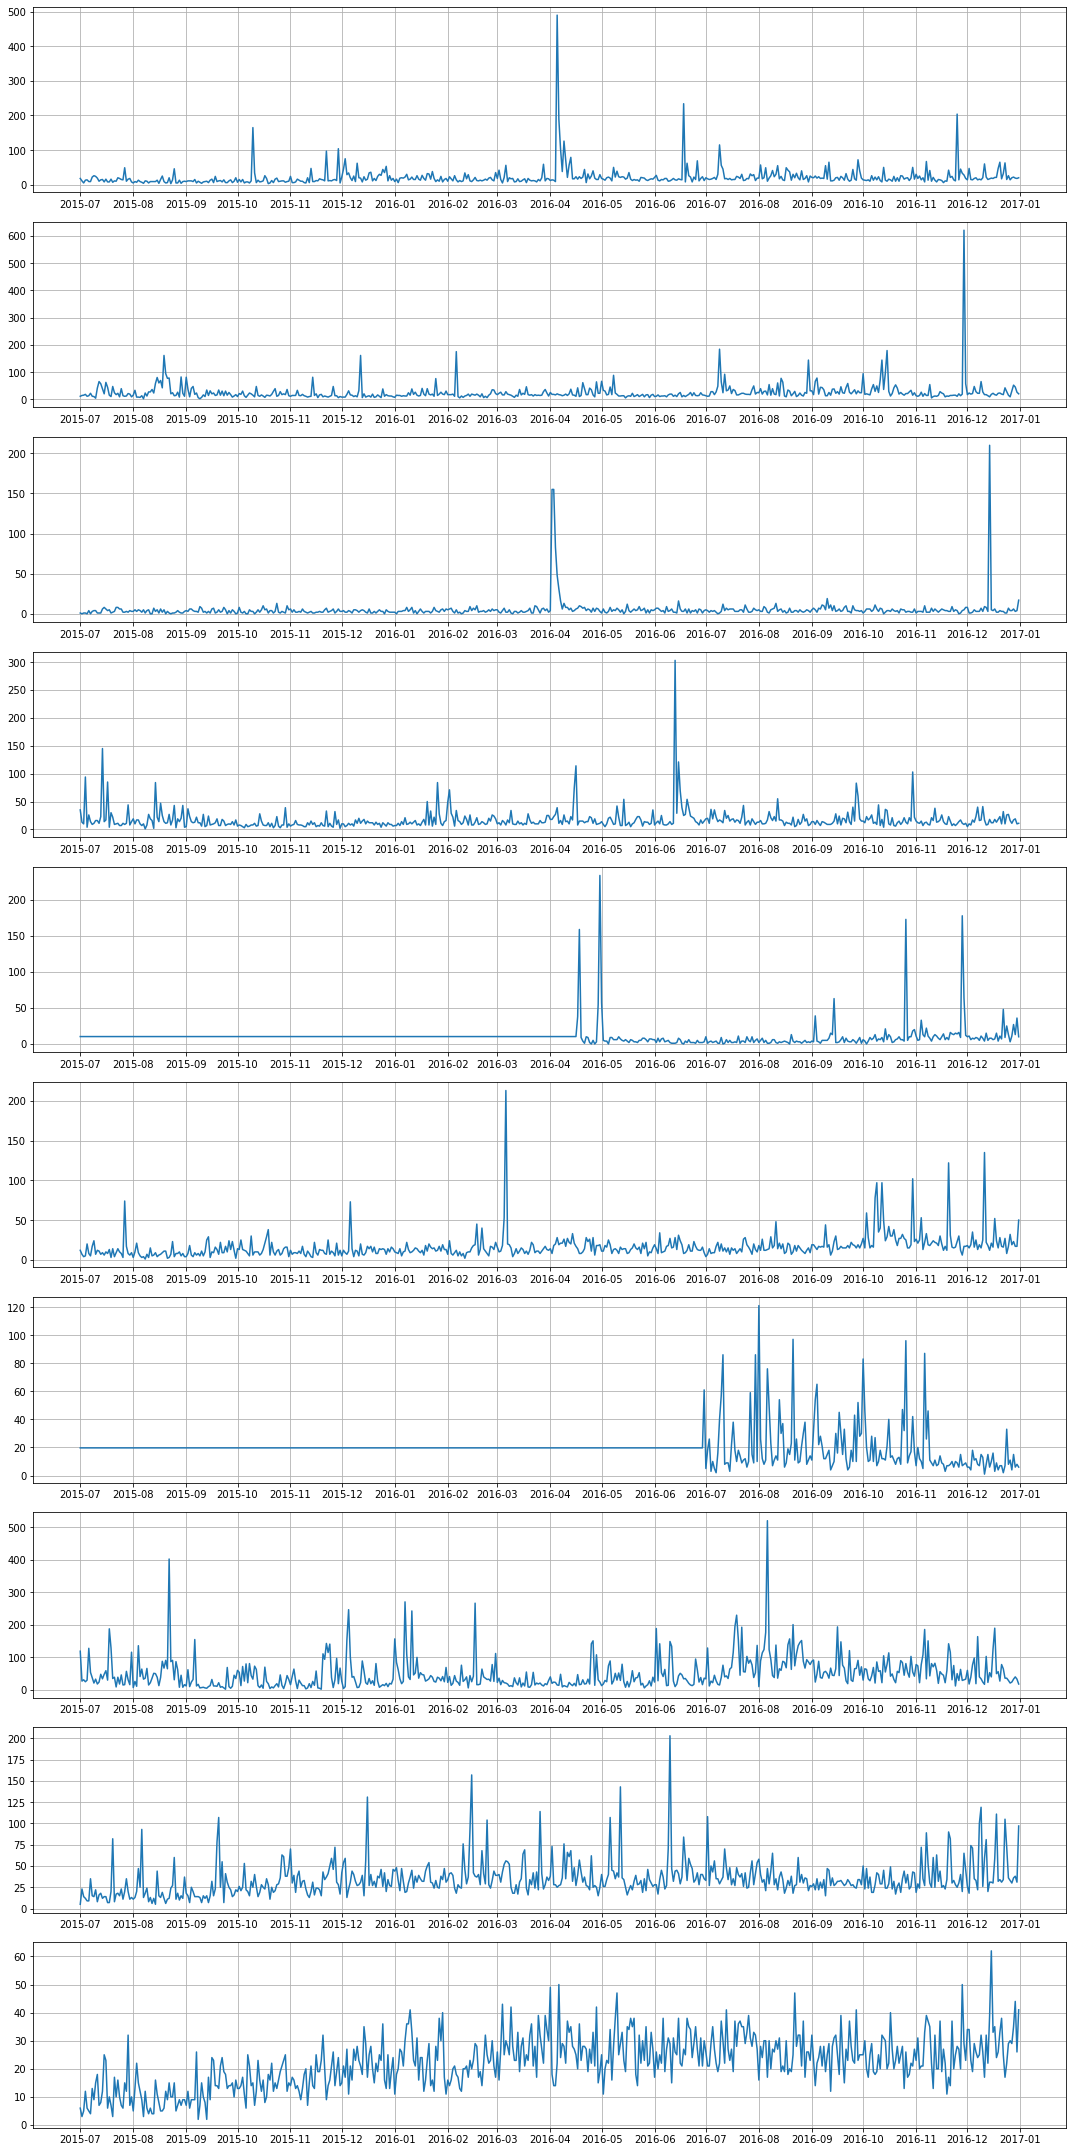

In [14]:
show_traffic(idx, data_list)

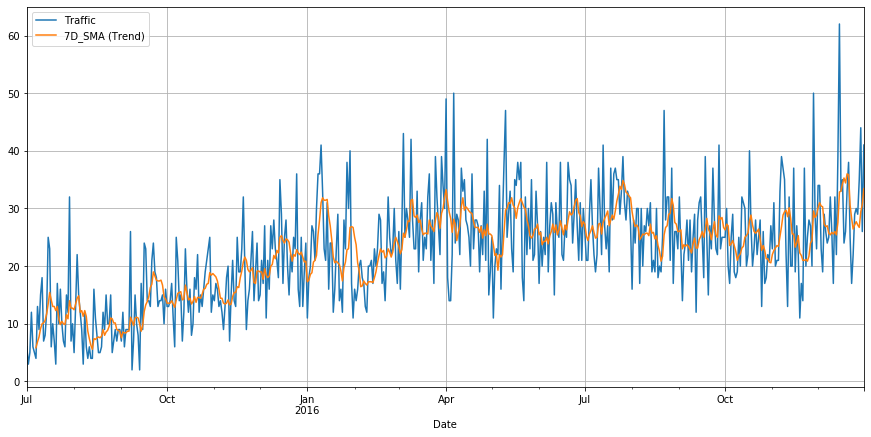

In [15]:
traffic_series = df_train_1.iloc[:, 9]

###

fig = plt.figure(figsize=(15, 7))

traffic_series.plot(label='Traffic')
traffic_series.rolling(window=7).mean().plot(label='7D_SMA (Trend)')

plt.grid(True)
plt.legend()

plt.show()

## Preprocessing Dataset for Single-Variate

### (Test for just one feature)

#### Preprocessing Dataset

In [16]:
NUM_TIME_STEP = 31
FEATURE_INDEX = 9

In [17]:
picked_data = df_train_1.iloc[:, FEATURE_INDEX]
picked_data = picked_data.to_frame()

picked_data

,ASCII_zh.wikipedia.org_all-access_spider
Date,
2015-07-01,6.0
2015-07-02,3.0
2015-07-03,5.0
2015-07-04,12.0
2015-07-05,6.0
...,...
2016-12-27,29.0
2016-12-28,35.0
2016-12-29,44.0


In [18]:
picked_data_column = picked_data.columns

for time_step in range(1, NUM_TIME_STEP + 1):
    picked_data['step_{}'.format(time_step)] = picked_data[picked_data_column].shift(time_step)

In [19]:
picked_data

,ASCII_zh.wikipedia.org_all-access_spider,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,...,step_22,step_23,step_24,step_25,step_26,step_27,step_28,step_29,step_30,step_31
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,12.0,5.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,6.0,12.0,5.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,29.0,30.0,29.0,22.0,17.0,25.0,38.0,33.0,26.0,24.0,...,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0,27.0
2016-12-28,35.0,29.0,30.0,29.0,22.0,17.0,25.0,38.0,33.0,26.0,...,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0
2016-12-29,44.0,35.0,29.0,30.0,29.0,22.0,17.0,25.0,38.0,33.0,...,24.0,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0


In [20]:
picked_series_data = picked_data.dropna()

In [21]:
picked_series_data

,ASCII_zh.wikipedia.org_all-access_spider,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,...,step_22,step_23,step_24,step_25,step_26,step_27,step_28,step_29,step_30,step_31
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-01,5.0,10.0,7.0,32.0,12.0,15.0,6.0,7.0,10.0,16.0,...,15.0,9.0,13.0,4.0,5.0,6.0,12.0,5.0,3.0,6.0
2015-08-02,13.0,5.0,10.0,7.0,32.0,12.0,15.0,6.0,7.0,10.0,...,18.0,15.0,9.0,13.0,4.0,5.0,6.0,12.0,5.0,3.0
2015-08-03,22.0,13.0,5.0,10.0,7.0,32.0,12.0,15.0,6.0,7.0,...,7.0,18.0,15.0,9.0,13.0,4.0,5.0,6.0,12.0,5.0
2015-08-04,15.0,22.0,13.0,5.0,10.0,7.0,32.0,12.0,15.0,6.0,...,8.0,7.0,18.0,15.0,9.0,13.0,4.0,5.0,6.0,12.0
2015-08-05,12.0,15.0,22.0,13.0,5.0,10.0,7.0,32.0,12.0,15.0,...,12.0,8.0,7.0,18.0,15.0,9.0,13.0,4.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,29.0,30.0,29.0,22.0,17.0,25.0,38.0,33.0,26.0,24.0,...,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0,27.0
2016-12-28,35.0,29.0,30.0,29.0,22.0,17.0,25.0,38.0,33.0,26.0,...,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0
2016-12-29,44.0,35.0,29.0,30.0,29.0,22.0,17.0,25.0,38.0,33.0,...,24.0,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0


In [22]:
NUM_ROW = picked_series_data.shape[0]
train_test_boundary = NUM_ROW - NUM_TIME_STEP

In [23]:
x_train = picked_series_data.iloc[:train_test_boundary, 1:]
y_train = picked_series_data.iloc[:train_test_boundary, 0]

x_test = picked_series_data.iloc[train_test_boundary:, 1:]
y_test = picked_series_data.iloc[train_test_boundary:, 0]

In [24]:
x_train

,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,step_10,...,step_22,step_23,step_24,step_25,step_26,step_27,step_28,step_29,step_30,step_31
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-01,10.0,7.0,32.0,12.0,15.0,6.0,7.0,10.0,16.0,10.0,...,15.0,9.0,13.0,4.0,5.0,6.0,12.0,5.0,3.0,6.0
2015-08-02,5.0,10.0,7.0,32.0,12.0,15.0,6.0,7.0,10.0,16.0,...,18.0,15.0,9.0,13.0,4.0,5.0,6.0,12.0,5.0,3.0
2015-08-03,13.0,5.0,10.0,7.0,32.0,12.0,15.0,6.0,7.0,10.0,...,7.0,18.0,15.0,9.0,13.0,4.0,5.0,6.0,12.0,5.0
2015-08-04,22.0,13.0,5.0,10.0,7.0,32.0,12.0,15.0,6.0,7.0,...,8.0,7.0,18.0,15.0,9.0,13.0,4.0,5.0,6.0,12.0
2015-08-05,15.0,22.0,13.0,5.0,10.0,7.0,32.0,12.0,15.0,6.0,...,12.0,8.0,7.0,18.0,15.0,9.0,13.0,4.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-26,28.0,25.0,20.0,37.0,14.0,17.0,11.0,22.0,27.0,19.0,...,21.0,20.0,31.0,23.0,27.0,21.0,22.0,18.0,17.0,26.0
2016-11-27,27.0,28.0,25.0,20.0,37.0,14.0,17.0,11.0,22.0,27.0,...,21.0,21.0,20.0,31.0,23.0,27.0,21.0,22.0,18.0,17.0
2016-11-28,20.0,27.0,28.0,25.0,20.0,37.0,14.0,17.0,11.0,22.0,...,33.0,21.0,21.0,20.0,31.0,23.0,27.0,21.0,22.0,18.0


In [25]:
y_train

Date
2015-08-01     5.0
2015-08-02    13.0
2015-08-03    22.0
2015-08-04    15.0
2015-08-05    12.0
              ... 
2016-11-26    27.0
2016-11-27    20.0
2016-11-28    50.0
2016-11-29    29.0
2016-11-30    23.0
Name: ASCII_zh.wikipedia.org_all-access_spider, Length: 488, dtype: float64

In [26]:
x_test

,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,step_10,...,step_22,step_23,step_24,step_25,step_26,step_27,step_28,step_29,step_30,step_31
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-01,23.0,29.0,50.0,20.0,27.0,28.0,25.0,20.0,37.0,14.0,...,35.0,37.0,39.0,33.0,21.0,21.0,20.0,31.0,23.0,27.0
2016-12-02,34.0,23.0,29.0,50.0,20.0,27.0,28.0,25.0,20.0,37.0,...,22.0,35.0,37.0,39.0,33.0,21.0,21.0,20.0,31.0,23.0
2016-12-03,34.0,34.0,23.0,29.0,50.0,20.0,27.0,28.0,25.0,20.0,...,13.0,22.0,35.0,37.0,39.0,33.0,21.0,21.0,20.0,31.0
2016-12-04,23.0,34.0,34.0,23.0,29.0,50.0,20.0,27.0,28.0,25.0,...,32.0,13.0,22.0,35.0,37.0,39.0,33.0,21.0,21.0,20.0
2016-12-05,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0,27.0,28.0,...,20.0,32.0,13.0,22.0,35.0,37.0,39.0,33.0,21.0,21.0
2016-12-06,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0,27.0,...,20.0,20.0,32.0,13.0,22.0,35.0,37.0,39.0,33.0,21.0
2016-12-07,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,20.0,...,37.0,20.0,20.0,32.0,13.0,22.0,35.0,37.0,39.0,33.0
2016-12-08,24.0,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,50.0,...,19.0,37.0,20.0,20.0,32.0,13.0,22.0,35.0,37.0,39.0
2016-12-09,25.0,24.0,26.0,29.0,19.0,23.0,34.0,34.0,23.0,29.0,...,27.0,19.0,37.0,20.0,20.0,32.0,13.0,22.0,35.0,37.0


In [27]:
y_test

Date
2016-12-01    34.0
2016-12-02    34.0
2016-12-03    23.0
2016-12-04    19.0
2016-12-05    29.0
2016-12-06    26.0
2016-12-07    24.0
2016-12-08    25.0
2016-12-09    32.0
2016-12-10    26.0
2016-12-11    17.0
2016-12-12    32.0
2016-12-13    22.0
2016-12-14    39.0
2016-12-15    62.0
2016-12-16    33.0
2016-12-17    35.0
2016-12-18    24.0
2016-12-19    26.0
2016-12-20    33.0
2016-12-21    38.0
2016-12-22    25.0
2016-12-23    17.0
2016-12-24    22.0
2016-12-25    29.0
2016-12-26    30.0
2016-12-27    29.0
2016-12-28    35.0
2016-12-29    44.0
2016-12-30    26.0
2016-12-31    41.0
Name: ASCII_zh.wikipedia.org_all-access_spider, dtype: float64

In [28]:
x_train = x_train.values
y_train = y_train.values

x_test = x_test.values
y_test = y_test.values

In [29]:
x_train = x_train.reshape(x_train.shape[0], NUM_TIME_STEP, 1)

x_test = x_test.reshape(x_test.shape[0], NUM_TIME_STEP, 1)

In [30]:
x_train.shape

(488, 31, 1)

### Modeling

In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [32]:
CLIPVALUE = 0.1

In [33]:
model = tf.keras.models.Sequential()

In [34]:
model.add(tf.keras.layers.GRU(
    256,
    return_sequences=True,
    input_shape=(NUM_TIME_STEP, 1)
))
model.add(tf.keras.layers.GRU(
    256,
    return_sequences=True
#     activation='relu'
))
model.add(tf.keras.layers.GRU(
    32
#     activation='relu'
))
# model.add(tf.keras.layers.Dense(
#     32,
#     activation='relu'
# ))
model.add(tf.keras.layers.Dense(
    1
))

In [35]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(clipvalue=CLIPVALUE),
    loss='mae'
)

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 31, 256)           198912    
_________________________________________________________________
gru_1 (GRU)                  (None, 31, 256)           394752    
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                27840     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 621,537
Trainable params: 621,537
Non-trainable params: 0
_________________________________________________________________


### Training

In [37]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=300,
    verbose=1
)

In [38]:
model.fit(
    x_train,
    y_train,
    epochs=10000,
    verbose=2,
    callbacks=[early_stopping]
)

Train on 488 samples
Epoch 1/10000
488/488 - 9s - loss: 16.3153
Epoch 2/10000
488/488 - 0s - loss: 15.1840
Epoch 3/10000
488/488 - 0s - loss: 14.6838
Epoch 4/10000
488/488 - 0s - loss: 14.2036
Epoch 5/10000
488/488 - 0s - loss: 13.7407
Epoch 6/10000
488/488 - 0s - loss: 13.2967
Epoch 7/10000
488/488 - 0s - loss: 12.8601
Epoch 8/10000
488/488 - 0s - loss: 12.4259
Epoch 9/10000
488/488 - 0s - loss: 12.0005
Epoch 10/10000
488/488 - 0s - loss: 11.5735
Epoch 11/10000
488/488 - 0s - loss: 11.1738
Epoch 12/10000
488/488 - 0s - loss: 10.7934
Epoch 13/10000
488/488 - 0s - loss: 10.4287
Epoch 14/10000
488/488 - 0s - loss: 10.0705
Epoch 15/10000
488/488 - 0s - loss: 9.7664
Epoch 16/10000
488/488 - 0s - loss: 9.4522
Epoch 17/10000
488/488 - 0s - loss: 9.1669
Epoch 18/10000
488/488 - 0s - loss: 8.8948
Epoch 19/10000
488/488 - 0s - loss: 8.6386
Epoch 20/10000
488/488 - 0s - loss: 8.4148
Epoch 21/10000
488/488 - 0s - loss: 8.2020
Epoch 22/10000
488/488 - 0s - loss: 8.0018
Epoch 23/10000
488/488 - 0s 

Epoch 189/10000
488/488 - 0s - loss: 2.2876
Epoch 190/10000
488/488 - 0s - loss: 2.2222
Epoch 191/10000
488/488 - 0s - loss: 2.1552
Epoch 192/10000
488/488 - 0s - loss: 2.1669
Epoch 193/10000
488/488 - 0s - loss: 2.1460
Epoch 194/10000
488/488 - 0s - loss: 2.0336
Epoch 195/10000
488/488 - 0s - loss: 2.0813
Epoch 196/10000
488/488 - 0s - loss: 2.0697
Epoch 197/10000
488/488 - 0s - loss: 2.2767
Epoch 198/10000
488/488 - 0s - loss: 1.9456
Epoch 199/10000
488/488 - 0s - loss: 2.0138
Epoch 200/10000
488/488 - 0s - loss: 1.9684
Epoch 201/10000
488/488 - 0s - loss: 1.9690
Epoch 202/10000
488/488 - 0s - loss: 1.9078
Epoch 203/10000
488/488 - 0s - loss: 1.8554
Epoch 204/10000
488/488 - 0s - loss: 1.9041
Epoch 205/10000
488/488 - 0s - loss: 1.7878
Epoch 206/10000
488/488 - 0s - loss: 1.9038
Epoch 207/10000
488/488 - 0s - loss: 1.8049
Epoch 208/10000
488/488 - 0s - loss: 1.9114
Epoch 209/10000
488/488 - 0s - loss: 1.7865
Epoch 210/10000
488/488 - 0s - loss: 1.7992
Epoch 211/10000
488/488 - 0s - l

488/488 - 0s - loss: 0.6079
Epoch 376/10000
488/488 - 0s - loss: 0.5839
Epoch 377/10000
488/488 - 0s - loss: 0.6201
Epoch 378/10000
488/488 - 0s - loss: 0.6001
Epoch 379/10000
488/488 - 0s - loss: 0.5803
Epoch 380/10000
488/488 - 0s - loss: 0.5751
Epoch 381/10000
488/488 - 0s - loss: 0.6149
Epoch 382/10000
488/488 - 0s - loss: 0.5557
Epoch 383/10000
488/488 - 0s - loss: 0.5680
Epoch 384/10000
488/488 - 0s - loss: 0.5397
Epoch 385/10000
488/488 - 0s - loss: 0.5533
Epoch 386/10000
488/488 - 0s - loss: 0.5944
Epoch 387/10000
488/488 - 0s - loss: 0.5413
Epoch 388/10000
488/488 - 0s - loss: 0.5725
Epoch 389/10000
488/488 - 0s - loss: 0.5954
Epoch 390/10000
488/488 - 0s - loss: 0.5459
Epoch 391/10000
488/488 - 0s - loss: 0.5608
Epoch 392/10000
488/488 - 0s - loss: 0.5577
Epoch 393/10000
488/488 - 0s - loss: 0.5549
Epoch 394/10000
488/488 - 0s - loss: 0.5175
Epoch 395/10000
488/488 - 0s - loss: 0.5369
Epoch 396/10000
488/488 - 0s - loss: 0.5286
Epoch 397/10000
488/488 - 0s - loss: 0.5204
Epoc

Epoch 562/10000
488/488 - 0s - loss: 0.3264
Epoch 563/10000
488/488 - 0s - loss: 0.3745
Epoch 564/10000
488/488 - 0s - loss: 0.3105
Epoch 565/10000
488/488 - 0s - loss: 0.3331
Epoch 566/10000
488/488 - 0s - loss: 0.3275
Epoch 567/10000
488/488 - 0s - loss: 0.3492
Epoch 568/10000
488/488 - 0s - loss: 0.3043
Epoch 569/10000
488/488 - 0s - loss: 0.3143
Epoch 570/10000
488/488 - 0s - loss: 0.3139
Epoch 571/10000
488/488 - 0s - loss: 0.3298
Epoch 572/10000
488/488 - 0s - loss: 0.3271
Epoch 573/10000
488/488 - 0s - loss: 0.3113
Epoch 574/10000
488/488 - 0s - loss: 0.3276
Epoch 575/10000
488/488 - 0s - loss: 0.3447
Epoch 576/10000
488/488 - 0s - loss: 0.3402
Epoch 577/10000
488/488 - 0s - loss: 0.2999
Epoch 578/10000
488/488 - 0s - loss: 0.3000
Epoch 579/10000
488/488 - 0s - loss: 0.3250
Epoch 580/10000
488/488 - 0s - loss: 0.3166
Epoch 581/10000
488/488 - 0s - loss: 0.3180
Epoch 582/10000
488/488 - 0s - loss: 0.3399
Epoch 583/10000
488/488 - 0s - loss: 0.3182
Epoch 584/10000
488/488 - 0s - l

488/488 - 0s - loss: 0.2424
Epoch 749/10000
488/488 - 0s - loss: 0.2559
Epoch 750/10000
488/488 - 0s - loss: 0.2646
Epoch 751/10000
488/488 - 0s - loss: 0.2584
Epoch 752/10000
488/488 - 0s - loss: 0.2508
Epoch 753/10000
488/488 - 0s - loss: 0.2517
Epoch 754/10000
488/488 - 0s - loss: 0.2570
Epoch 755/10000
488/488 - 0s - loss: 0.2432
Epoch 756/10000
488/488 - 0s - loss: 0.2511
Epoch 757/10000
488/488 - 0s - loss: 0.2482
Epoch 758/10000
488/488 - 0s - loss: 0.2459
Epoch 759/10000
488/488 - 0s - loss: 0.2482
Epoch 760/10000
488/488 - 0s - loss: 0.2805
Epoch 761/10000
488/488 - 0s - loss: 0.2388
Epoch 762/10000
488/488 - 0s - loss: 0.2379
Epoch 763/10000
488/488 - 0s - loss: 0.2436
Epoch 764/10000
488/488 - 0s - loss: 0.2490
Epoch 765/10000
488/488 - 0s - loss: 0.2411
Epoch 766/10000
488/488 - 0s - loss: 0.2490
Epoch 767/10000
488/488 - 0s - loss: 0.2315
Epoch 768/10000
488/488 - 0s - loss: 0.2518
Epoch 769/10000
488/488 - 0s - loss: 0.2476
Epoch 770/10000
488/488 - 0s - loss: 0.2715
Epoc

Epoch 935/10000
488/488 - 0s - loss: 0.2093
Epoch 936/10000
488/488 - 0s - loss: 0.2000
Epoch 937/10000
488/488 - 0s - loss: 0.2162
Epoch 938/10000
488/488 - 0s - loss: 0.2142
Epoch 939/10000
488/488 - 0s - loss: 0.2070
Epoch 940/10000
488/488 - 0s - loss: 0.2270
Epoch 941/10000
488/488 - 0s - loss: 0.2222
Epoch 942/10000
488/488 - 0s - loss: 0.2175
Epoch 943/10000
488/488 - 0s - loss: 0.2141
Epoch 944/10000
488/488 - 0s - loss: 0.2166
Epoch 945/10000
488/488 - 0s - loss: 0.2047
Epoch 946/10000
488/488 - 0s - loss: 0.2097
Epoch 947/10000
488/488 - 0s - loss: 0.1950
Epoch 948/10000
488/488 - 0s - loss: 0.2029
Epoch 949/10000
488/488 - 0s - loss: 0.2003
Epoch 950/10000
488/488 - 0s - loss: 0.2029
Epoch 951/10000
488/488 - 0s - loss: 0.2178
Epoch 952/10000
488/488 - 0s - loss: 0.1969
Epoch 953/10000
488/488 - 0s - loss: 0.2093
Epoch 954/10000
488/488 - 0s - loss: 0.2038
Epoch 955/10000
488/488 - 0s - loss: 0.2044
Epoch 956/10000
488/488 - 0s - loss: 0.2063
Epoch 957/10000
488/488 - 0s - l

Epoch 1119/10000
488/488 - 0s - loss: 0.1781
Epoch 1120/10000
488/488 - 0s - loss: 0.1838
Epoch 1121/10000
488/488 - 0s - loss: 0.1912
Epoch 1122/10000
488/488 - 0s - loss: 0.1718
Epoch 1123/10000
488/488 - 0s - loss: 0.1632
Epoch 1124/10000
488/488 - 0s - loss: 0.1828
Epoch 1125/10000
488/488 - 0s - loss: 0.1781
Epoch 1126/10000
488/488 - 0s - loss: 0.1795
Epoch 1127/10000
488/488 - 0s - loss: 0.1886
Epoch 1128/10000
488/488 - 0s - loss: 0.1898
Epoch 1129/10000
488/488 - 0s - loss: 0.1691
Epoch 1130/10000
488/488 - 0s - loss: 0.1572
Epoch 1131/10000
488/488 - 0s - loss: 0.1695
Epoch 1132/10000
488/488 - 0s - loss: 0.1605
Epoch 1133/10000
488/488 - 0s - loss: 0.1682
Epoch 1134/10000
488/488 - 0s - loss: 0.1557
Epoch 1135/10000
488/488 - 0s - loss: 0.1677
Epoch 1136/10000
488/488 - 0s - loss: 0.1721
Epoch 1137/10000
488/488 - 0s - loss: 0.1680
Epoch 1138/10000
488/488 - 0s - loss: 0.1669
Epoch 1139/10000
488/488 - 0s - loss: 0.1605
Epoch 1140/10000
488/488 - 0s - loss: 0.1717
Epoch 1141

488/488 - 0s - loss: 0.1438
Epoch 1302/10000
488/488 - 0s - loss: 0.1471
Epoch 1303/10000
488/488 - 0s - loss: 0.1426
Epoch 1304/10000
488/488 - 0s - loss: 0.1665
Epoch 1305/10000
488/488 - 0s - loss: 0.1342
Epoch 1306/10000
488/488 - 0s - loss: 0.1443
Epoch 1307/10000
488/488 - 0s - loss: 0.1406
Epoch 1308/10000
488/488 - 0s - loss: 0.1479
Epoch 1309/10000
488/488 - 0s - loss: 0.1439
Epoch 1310/10000
488/488 - 0s - loss: 0.1445
Epoch 1311/10000
488/488 - 0s - loss: 0.1425
Epoch 1312/10000
488/488 - 0s - loss: 0.1460
Epoch 1313/10000
488/488 - 0s - loss: 0.1461
Epoch 1314/10000
488/488 - 0s - loss: 0.1601
Epoch 1315/10000
488/488 - 0s - loss: 0.1478
Epoch 1316/10000
488/488 - 0s - loss: 0.1403
Epoch 1317/10000
488/488 - 0s - loss: 0.1422
Epoch 1318/10000
488/488 - 0s - loss: 0.1461
Epoch 1319/10000
488/488 - 0s - loss: 0.1399
Epoch 1320/10000
488/488 - 0s - loss: 0.1399
Epoch 1321/10000
488/488 - 0s - loss: 0.1514
Epoch 1322/10000
488/488 - 0s - loss: 0.1488
Epoch 1323/10000
488/488 - 

Epoch 1484/10000
488/488 - 0s - loss: 0.1320
Epoch 1485/10000
488/488 - 0s - loss: 0.1294
Epoch 1486/10000
488/488 - 0s - loss: 0.1294
Epoch 1487/10000
488/488 - 0s - loss: 0.1329
Epoch 1488/10000
488/488 - 0s - loss: 0.1334
Epoch 1489/10000
488/488 - 0s - loss: 0.1284
Epoch 1490/10000
488/488 - 0s - loss: 0.1271
Epoch 1491/10000
488/488 - 0s - loss: 0.1296
Epoch 1492/10000
488/488 - 0s - loss: 0.1365
Epoch 1493/10000
488/488 - 0s - loss: 0.1303
Epoch 1494/10000
488/488 - 0s - loss: 0.1406
Epoch 1495/10000
488/488 - 0s - loss: 0.1473
Epoch 1496/10000
488/488 - 0s - loss: 0.1282
Epoch 1497/10000
488/488 - 0s - loss: 0.1311
Epoch 1498/10000
488/488 - 0s - loss: 0.1348
Epoch 1499/10000
488/488 - 0s - loss: 0.1283
Epoch 1500/10000
488/488 - 0s - loss: 0.1278
Epoch 1501/10000
488/488 - 0s - loss: 0.1301
Epoch 1502/10000
488/488 - 0s - loss: 0.1310
Epoch 1503/10000
488/488 - 0s - loss: 0.1301
Epoch 1504/10000
488/488 - 0s - loss: 0.1310
Epoch 1505/10000
488/488 - 0s - loss: 0.1292
Epoch 1506

488/488 - 0s - loss: 0.1195
Epoch 1667/10000
488/488 - 0s - loss: 0.1260
Epoch 1668/10000
488/488 - 0s - loss: 0.1260
Epoch 1669/10000
488/488 - 0s - loss: 0.1278
Epoch 1670/10000
488/488 - 0s - loss: 0.1229
Epoch 1671/10000
488/488 - 0s - loss: 0.1273
Epoch 1672/10000
488/488 - 0s - loss: 0.1414
Epoch 1673/10000
488/488 - 0s - loss: 0.1315
Epoch 1674/10000
488/488 - 0s - loss: 0.1286
Epoch 1675/10000
488/488 - 0s - loss: 0.1216
Epoch 1676/10000
488/488 - 0s - loss: 0.1286
Epoch 1677/10000
488/488 - 0s - loss: 0.1263
Epoch 1678/10000
488/488 - 0s - loss: 0.1210
Epoch 1679/10000
488/488 - 0s - loss: 0.1279
Epoch 1680/10000
488/488 - 0s - loss: 0.1454
Epoch 1681/10000
488/488 - 0s - loss: 0.1267
Epoch 1682/10000
488/488 - 0s - loss: 0.1305
Epoch 1683/10000
488/488 - 0s - loss: 0.1211
Epoch 1684/10000
488/488 - 0s - loss: 0.1189
Epoch 1685/10000
488/488 - 0s - loss: 0.1254
Epoch 1686/10000
488/488 - 0s - loss: 0.1200
Epoch 1687/10000
488/488 - 0s - loss: 0.1335
Epoch 1688/10000
488/488 - 

Epoch 1849/10000
488/488 - 0s - loss: 0.1115
Epoch 1850/10000
488/488 - 0s - loss: 0.1174
Epoch 1851/10000
488/488 - 0s - loss: 0.1159
Epoch 1852/10000
488/488 - 0s - loss: 0.1124
Epoch 1853/10000
488/488 - 0s - loss: 0.1137
Epoch 1854/10000
488/488 - 0s - loss: 0.1193
Epoch 1855/10000
488/488 - 0s - loss: 0.1156
Epoch 1856/10000
488/488 - 0s - loss: 0.1174
Epoch 1857/10000
488/488 - 0s - loss: 0.1148
Epoch 1858/10000
488/488 - 0s - loss: 0.1159
Epoch 1859/10000
488/488 - 0s - loss: 0.1130
Epoch 1860/10000
488/488 - 0s - loss: 0.1192
Epoch 1861/10000
488/488 - 0s - loss: 0.1132
Epoch 1862/10000
488/488 - 0s - loss: 0.1135
Epoch 1863/10000
488/488 - 0s - loss: 0.1107
Epoch 1864/10000
488/488 - 0s - loss: 0.1152
Epoch 1865/10000
488/488 - 0s - loss: 0.1144
Epoch 1866/10000
488/488 - 0s - loss: 0.1135
Epoch 1867/10000
488/488 - 0s - loss: 0.1124
Epoch 1868/10000
488/488 - 0s - loss: 0.1139
Epoch 1869/10000
488/488 - 0s - loss: 0.1129
Epoch 1870/10000
488/488 - 0s - loss: 0.1130
Epoch 1871

488/488 - 0s - loss: 0.1138
Epoch 2032/10000
488/488 - 0s - loss: 0.1098
Epoch 2033/10000
488/488 - 0s - loss: 0.1141
Epoch 2034/10000
488/488 - 0s - loss: 0.1128
Epoch 2035/10000
488/488 - 0s - loss: 0.1167
Epoch 2036/10000
488/488 - 0s - loss: 0.1077
Epoch 2037/10000
488/488 - 0s - loss: 0.1108
Epoch 2038/10000
488/488 - 0s - loss: 0.1165
Epoch 2039/10000
488/488 - 0s - loss: 0.1227
Epoch 2040/10000
488/488 - 0s - loss: 0.1117
Epoch 2041/10000
488/488 - 0s - loss: 0.1352
Epoch 2042/10000
488/488 - 0s - loss: 0.1039
Epoch 2043/10000
488/488 - 0s - loss: 0.1144
Epoch 2044/10000
488/488 - 0s - loss: 0.1168
Epoch 2045/10000
488/488 - 0s - loss: 0.1097
Epoch 2046/10000
488/488 - 0s - loss: 0.1074
Epoch 2047/10000
488/488 - 0s - loss: 0.1131
Epoch 2048/10000
488/488 - 0s - loss: 0.1107
Epoch 2049/10000
488/488 - 0s - loss: 0.1164
Epoch 2050/10000
488/488 - 0s - loss: 0.1094
Epoch 2051/10000
488/488 - 0s - loss: 0.1100
Epoch 2052/10000
488/488 - 0s - loss: 0.1079
Epoch 2053/10000
488/488 - 

Epoch 2214/10000
488/488 - 0s - loss: 0.1034
Epoch 2215/10000
488/488 - 0s - loss: 0.1135
Epoch 2216/10000
488/488 - 0s - loss: 0.1062
Epoch 2217/10000
488/488 - 0s - loss: 0.1018
Epoch 2218/10000
488/488 - 0s - loss: 0.1046
Epoch 2219/10000
488/488 - 0s - loss: 0.1059
Epoch 2220/10000
488/488 - 0s - loss: 0.1073
Epoch 2221/10000
488/488 - 0s - loss: 0.1035
Epoch 2222/10000
488/488 - 0s - loss: 0.1095
Epoch 2223/10000
488/488 - 0s - loss: 0.1067
Epoch 2224/10000
488/488 - 0s - loss: 0.1080
Epoch 2225/10000
488/488 - 0s - loss: 0.1041
Epoch 2226/10000
488/488 - 0s - loss: 0.1091
Epoch 2227/10000
488/488 - 0s - loss: 0.1028
Epoch 2228/10000
488/488 - 0s - loss: 0.1086
Epoch 2229/10000
488/488 - 0s - loss: 0.1140
Epoch 2230/10000
488/488 - 0s - loss: 0.1040
Epoch 2231/10000
488/488 - 0s - loss: 0.1042
Epoch 2232/10000
488/488 - 0s - loss: 0.1153
Epoch 2233/10000
488/488 - 0s - loss: 0.1046
Epoch 2234/10000
488/488 - 0s - loss: 0.1058
Epoch 2235/10000
488/488 - 0s - loss: 0.1092
Epoch 2236

488/488 - 0s - loss: 0.0974
Epoch 2397/10000
488/488 - 0s - loss: 0.1017
Epoch 2398/10000
488/488 - 0s - loss: 0.1041
Epoch 2399/10000
488/488 - 0s - loss: 0.1087
Epoch 2400/10000
488/488 - 0s - loss: 0.1039
Epoch 2401/10000
488/488 - 0s - loss: 0.1018
Epoch 2402/10000
488/488 - 0s - loss: 0.1019
Epoch 2403/10000
488/488 - 0s - loss: 0.1071
Epoch 2404/10000
488/488 - 0s - loss: 0.1020
Epoch 2405/10000
488/488 - 0s - loss: 0.1008
Epoch 2406/10000
488/488 - 0s - loss: 0.1061
Epoch 2407/10000
488/488 - 0s - loss: 0.1050
Epoch 2408/10000
488/488 - 0s - loss: 0.1060
Epoch 2409/10000
488/488 - 0s - loss: 0.0997
Epoch 2410/10000
488/488 - 0s - loss: 0.1057
Epoch 2411/10000
488/488 - 0s - loss: 0.1036
Epoch 2412/10000
488/488 - 0s - loss: 0.1002
Epoch 2413/10000
488/488 - 0s - loss: 0.1013
Epoch 2414/10000
488/488 - 0s - loss: 0.1015
Epoch 2415/10000
488/488 - 0s - loss: 0.1014
Epoch 2416/10000
488/488 - 0s - loss: 0.1050
Epoch 2417/10000
488/488 - 0s - loss: 0.1013
Epoch 2418/10000
488/488 - 

Epoch 2579/10000
488/488 - 0s - loss: 0.1045
Epoch 2580/10000
488/488 - 0s - loss: 0.1063
Epoch 2581/10000
488/488 - 0s - loss: 0.0998
Epoch 2582/10000
488/488 - 0s - loss: 0.0990
Epoch 2583/10000
488/488 - 0s - loss: 0.1019
Epoch 2584/10000
488/488 - 0s - loss: 0.1063
Epoch 2585/10000
488/488 - 0s - loss: 0.1030
Epoch 2586/10000
488/488 - 0s - loss: 0.0995
Epoch 2587/10000
488/488 - 0s - loss: 0.0944
Epoch 2588/10000
488/488 - 0s - loss: 0.0992
Epoch 2589/10000
488/488 - 0s - loss: 0.0969
Epoch 2590/10000
488/488 - 0s - loss: 0.0999
Epoch 2591/10000
488/488 - 0s - loss: 0.1015
Epoch 2592/10000
488/488 - 0s - loss: 0.0974
Epoch 2593/10000
488/488 - 0s - loss: 0.1036
Epoch 2594/10000
488/488 - 0s - loss: 0.0994
Epoch 2595/10000
488/488 - 0s - loss: 0.1104
Epoch 2596/10000
488/488 - 0s - loss: 0.0973
Epoch 2597/10000
488/488 - 0s - loss: 0.1051
Epoch 2598/10000
488/488 - 0s - loss: 0.0998
Epoch 2599/10000
488/488 - 0s - loss: 0.0994
Epoch 2600/10000
488/488 - 0s - loss: 0.0939
Epoch 2601

488/488 - 0s - loss: 0.0975
Epoch 2762/10000
488/488 - 0s - loss: 0.0956
Epoch 2763/10000
488/488 - 0s - loss: 0.1011
Epoch 2764/10000
488/488 - 0s - loss: 0.1012
Epoch 2765/10000
488/488 - 0s - loss: 0.0989
Epoch 2766/10000
488/488 - 0s - loss: 0.0960
Epoch 2767/10000
488/488 - 0s - loss: 0.0983
Epoch 2768/10000
488/488 - 0s - loss: 0.0976
Epoch 2769/10000
488/488 - 0s - loss: 0.0980
Epoch 2770/10000
488/488 - 0s - loss: 0.0993
Epoch 2771/10000
488/488 - 0s - loss: 0.0941
Epoch 2772/10000
488/488 - 0s - loss: 0.0979
Epoch 2773/10000
488/488 - 0s - loss: 0.1847
Epoch 2774/10000
488/488 - 0s - loss: 0.0915
Epoch 2775/10000
488/488 - 0s - loss: 0.1232
Epoch 2776/10000
488/488 - 0s - loss: 0.0905
Epoch 2777/10000
488/488 - 0s - loss: 0.0906
Epoch 2778/10000
488/488 - 0s - loss: 0.0948
Epoch 2779/10000
488/488 - 0s - loss: 0.0972
Epoch 2780/10000
488/488 - 0s - loss: 0.0960
Epoch 2781/10000
488/488 - 0s - loss: 0.1130
Epoch 2782/10000
488/488 - 0s - loss: 0.0970
Epoch 2783/10000
488/488 - 

Epoch 2944/10000
488/488 - 0s - loss: 0.0934
Epoch 2945/10000
488/488 - 0s - loss: 0.0940
Epoch 2946/10000
488/488 - 0s - loss: 0.0915
Epoch 2947/10000
488/488 - 0s - loss: 0.0971
Epoch 2948/10000
488/488 - 0s - loss: 0.0958
Epoch 2949/10000
488/488 - 0s - loss: 0.0933
Epoch 2950/10000
488/488 - 0s - loss: 0.0980
Epoch 2951/10000
488/488 - 0s - loss: 0.0925
Epoch 2952/10000
488/488 - 0s - loss: 0.0937
Epoch 2953/10000
488/488 - 0s - loss: 0.0936
Epoch 2954/10000
488/488 - 0s - loss: 0.0988
Epoch 2955/10000
488/488 - 0s - loss: 0.0931
Epoch 2956/10000
488/488 - 0s - loss: 0.0927
Epoch 2957/10000
488/488 - 0s - loss: 0.1062
Epoch 2958/10000
488/488 - 0s - loss: 0.0957
Epoch 2959/10000
488/488 - 0s - loss: 0.0973
Epoch 2960/10000
488/488 - 0s - loss: 0.1269
Epoch 2961/10000
488/488 - 0s - loss: 0.1069
Epoch 2962/10000
488/488 - 0s - loss: 0.1099
Epoch 2963/10000
488/488 - 0s - loss: 0.1093
Epoch 2964/10000
488/488 - 0s - loss: 0.1028
Epoch 2965/10000
488/488 - 0s - loss: 0.0899
Epoch 2966

488/488 - 0s - loss: 0.1055
Epoch 3127/10000
488/488 - 0s - loss: 0.0938
Epoch 3128/10000
488/488 - 0s - loss: 0.0947
Epoch 3129/10000
488/488 - 0s - loss: 0.1038
Epoch 3130/10000
488/488 - 0s - loss: 0.0938
Epoch 3131/10000
488/488 - 0s - loss: 0.0885
Epoch 3132/10000
488/488 - 0s - loss: 0.0920
Epoch 3133/10000
488/488 - 0s - loss: 0.0897
Epoch 3134/10000
488/488 - 0s - loss: 0.0988
Epoch 3135/10000
488/488 - 0s - loss: 0.0890
Epoch 3136/10000
488/488 - 0s - loss: 0.0860
Epoch 3137/10000
488/488 - 0s - loss: 0.0868
Epoch 3138/10000
488/488 - 0s - loss: 0.0919
Epoch 3139/10000
488/488 - 0s - loss: 0.0860
Epoch 3140/10000
488/488 - 0s - loss: 0.0910
Epoch 3141/10000
488/488 - 0s - loss: 0.0931
Epoch 3142/10000
488/488 - 0s - loss: 0.0906
Epoch 3143/10000
488/488 - 0s - loss: 0.0878
Epoch 3144/10000
488/488 - 0s - loss: 0.0914
Epoch 3145/10000
488/488 - 0s - loss: 0.0936
Epoch 3146/10000
488/488 - 0s - loss: 0.0915
Epoch 3147/10000
488/488 - 0s - loss: 0.0889
Epoch 3148/10000
488/488 - 

Epoch 3309/10000
488/488 - 0s - loss: 0.0897
Epoch 3310/10000
488/488 - 0s - loss: 0.0884
Epoch 3311/10000
488/488 - 0s - loss: 0.0892
Epoch 3312/10000
488/488 - 0s - loss: 0.0857
Epoch 3313/10000
488/488 - 0s - loss: 0.0875
Epoch 3314/10000
488/488 - 0s - loss: 0.0894
Epoch 3315/10000
488/488 - 0s - loss: 0.0913
Epoch 3316/10000
488/488 - 0s - loss: 0.1176
Epoch 3317/10000
488/488 - 0s - loss: 0.1032
Epoch 3318/10000
488/488 - 0s - loss: 0.1043
Epoch 3319/10000
488/488 - 0s - loss: 0.0937
Epoch 3320/10000
488/488 - 0s - loss: 0.1133
Epoch 3321/10000
488/488 - 0s - loss: 0.0942
Epoch 3322/10000
488/488 - 0s - loss: 0.0983
Epoch 3323/10000
488/488 - 0s - loss: 0.0935
Epoch 3324/10000
488/488 - 0s - loss: 0.0975
Epoch 3325/10000
488/488 - 0s - loss: 0.0939
Epoch 3326/10000
488/488 - 0s - loss: 0.0924
Epoch 3327/10000
488/488 - 0s - loss: 0.0939
Epoch 3328/10000
488/488 - 0s - loss: 0.0886
Epoch 3329/10000
488/488 - 0s - loss: 0.1045
Epoch 3330/10000
488/488 - 0s - loss: 0.0948
Epoch 3331

488/488 - 0s - loss: 0.0852
Epoch 3492/10000
488/488 - 0s - loss: 0.0921
Epoch 3493/10000
488/488 - 0s - loss: 0.0867
Epoch 3494/10000
488/488 - 0s - loss: 0.0877
Epoch 3495/10000
488/488 - 0s - loss: 0.0942
Epoch 3496/10000
488/488 - 0s - loss: 0.0850
Epoch 3497/10000
488/488 - 0s - loss: 0.0849
Epoch 3498/10000
488/488 - 0s - loss: 0.0874
Epoch 3499/10000
488/488 - 0s - loss: 0.0840
Epoch 3500/10000
488/488 - 0s - loss: 0.0913
Epoch 3501/10000
488/488 - 0s - loss: 0.0851
Epoch 3502/10000
488/488 - 0s - loss: 0.0875
Epoch 3503/10000
488/488 - 0s - loss: 0.0897
Epoch 3504/10000
488/488 - 0s - loss: 0.1005
Epoch 3505/10000
488/488 - 0s - loss: 0.0929
Epoch 3506/10000
488/488 - 0s - loss: 0.0869
Epoch 3507/10000
488/488 - 0s - loss: 0.0869
Epoch 3508/10000
488/488 - 0s - loss: 0.0893
Epoch 3509/10000
488/488 - 0s - loss: 0.0858
Epoch 3510/10000
488/488 - 0s - loss: 0.0892
Epoch 3511/10000
488/488 - 0s - loss: 0.0859
Epoch 3512/10000
488/488 - 0s - loss: 0.0939
Epoch 3513/10000
488/488 - 

Epoch 3674/10000
488/488 - 0s - loss: 0.0827
Epoch 3675/10000
488/488 - 0s - loss: 0.0831
Epoch 3676/10000
488/488 - 0s - loss: 0.0836
Epoch 3677/10000
488/488 - 0s - loss: 0.0814
Epoch 3678/10000
488/488 - 0s - loss: 0.0869
Epoch 3679/10000
488/488 - 0s - loss: 0.0813
Epoch 3680/10000
488/488 - 0s - loss: 0.0820
Epoch 3681/10000
488/488 - 0s - loss: 0.0872
Epoch 3682/10000
488/488 - 0s - loss: 0.0843
Epoch 3683/10000
488/488 - 0s - loss: 0.0832
Epoch 3684/10000
488/488 - 0s - loss: 0.0815
Epoch 3685/10000
488/488 - 0s - loss: 0.0848
Epoch 3686/10000
488/488 - 0s - loss: 0.0808
Epoch 3687/10000
488/488 - 0s - loss: 0.0853
Epoch 3688/10000
488/488 - 0s - loss: 0.0827
Epoch 3689/10000
488/488 - 0s - loss: 0.0870
Epoch 3690/10000
488/488 - 0s - loss: 0.0806
Epoch 3691/10000
488/488 - 0s - loss: 0.0895
Epoch 3692/10000
488/488 - 0s - loss: 0.0814
Epoch 3693/10000
488/488 - 0s - loss: 0.0863
Epoch 3694/10000
488/488 - 0s - loss: 0.0810
Epoch 3695/10000
488/488 - 0s - loss: 0.0855
Epoch 3696

488/488 - 0s - loss: 0.0803
Epoch 3857/10000
488/488 - 0s - loss: 0.0803
Epoch 3858/10000
488/488 - 0s - loss: 0.0842
Epoch 3859/10000
488/488 - 0s - loss: 0.0862
Epoch 3860/10000
488/488 - 0s - loss: 0.0786
Epoch 3861/10000
488/488 - 0s - loss: 0.0803
Epoch 3862/10000
488/488 - 0s - loss: 0.0824
Epoch 3863/10000
488/488 - 0s - loss: 0.0811
Epoch 3864/10000
488/488 - 0s - loss: 0.0817
Epoch 3865/10000
488/488 - 0s - loss: 0.0866
Epoch 3866/10000
488/488 - 0s - loss: 0.0795
Epoch 3867/10000
488/488 - 0s - loss: 0.0841
Epoch 3868/10000
488/488 - 0s - loss: 0.0820
Epoch 3869/10000
488/488 - 0s - loss: 0.0842
Epoch 3870/10000
488/488 - 0s - loss: 0.0769
Epoch 3871/10000
488/488 - 0s - loss: 0.0867
Epoch 3872/10000
488/488 - 0s - loss: 0.0893
Epoch 3873/10000
488/488 - 0s - loss: 0.0831
Epoch 3874/10000
488/488 - 0s - loss: 0.0839
Epoch 3875/10000
488/488 - 0s - loss: 0.0813
Epoch 3876/10000
488/488 - 0s - loss: 0.0772
Epoch 3877/10000
488/488 - 0s - loss: 0.0795
Epoch 3878/10000
488/488 - 

Epoch 4039/10000
488/488 - 0s - loss: 0.0820
Epoch 4040/10000
488/488 - 0s - loss: 0.0822
Epoch 4041/10000
488/488 - 0s - loss: 0.0768
Epoch 4042/10000
488/488 - 0s - loss: 0.0867
Epoch 4043/10000
488/488 - 0s - loss: 0.0792
Epoch 4044/10000
488/488 - 0s - loss: 0.0824
Epoch 4045/10000
488/488 - 0s - loss: 0.0794
Epoch 4046/10000
488/488 - 0s - loss: 0.0899
Epoch 4047/10000
488/488 - 0s - loss: 0.0810
Epoch 4048/10000
488/488 - 0s - loss: 0.0728
Epoch 4049/10000
488/488 - 0s - loss: 0.0778
Epoch 4050/10000
488/488 - 0s - loss: 0.0747
Epoch 4051/10000
488/488 - 0s - loss: 0.0801
Epoch 4052/10000
488/488 - 0s - loss: 0.0776
Epoch 4053/10000
488/488 - 0s - loss: 0.0781
Epoch 4054/10000
488/488 - 0s - loss: 0.0776
Epoch 4055/10000
488/488 - 0s - loss: 0.0782
Epoch 4056/10000
488/488 - 0s - loss: 0.0747
Epoch 4057/10000
488/488 - 0s - loss: 0.0776
Epoch 4058/10000
488/488 - 0s - loss: 0.0782
Epoch 4059/10000
488/488 - 0s - loss: 0.0762
Epoch 4060/10000
488/488 - 0s - loss: 0.0792
Epoch 4061

488/488 - 0s - loss: 0.0788
Epoch 4222/10000
488/488 - 0s - loss: 0.0767
Epoch 4223/10000
488/488 - 0s - loss: 0.0759
Epoch 4224/10000
488/488 - 0s - loss: 0.0788
Epoch 4225/10000
488/488 - 0s - loss: 0.0781
Epoch 4226/10000
488/488 - 0s - loss: 0.0717
Epoch 4227/10000
488/488 - 0s - loss: 0.0727
Epoch 4228/10000
488/488 - 0s - loss: 0.0775
Epoch 4229/10000
488/488 - 0s - loss: 0.0819
Epoch 4230/10000
488/488 - 0s - loss: 0.0840
Epoch 4231/10000
488/488 - 0s - loss: 0.0879
Epoch 4232/10000
488/488 - 0s - loss: 0.0818
Epoch 4233/10000
488/488 - 0s - loss: 0.1059
Epoch 4234/10000
488/488 - 0s - loss: 0.0705
Epoch 4235/10000
488/488 - 0s - loss: 0.0712
Epoch 4236/10000
488/488 - 0s - loss: 0.0689
Epoch 4237/10000
488/488 - 0s - loss: 0.0798
Epoch 4238/10000
488/488 - 0s - loss: 0.0800
Epoch 4239/10000
488/488 - 0s - loss: 0.0783
Epoch 4240/10000
488/488 - 0s - loss: 0.0741
Epoch 4241/10000
488/488 - 0s - loss: 0.0755
Epoch 4242/10000
488/488 - 0s - loss: 0.0749
Epoch 4243/10000
488/488 - 

Epoch 4404/10000
488/488 - 0s - loss: 0.0752
Epoch 4405/10000
488/488 - 0s - loss: 0.0687
Epoch 4406/10000
488/488 - 0s - loss: 0.0722
Epoch 4407/10000
488/488 - 0s - loss: 0.0817
Epoch 4408/10000
488/488 - 0s - loss: 0.0748
Epoch 4409/10000
488/488 - 0s - loss: 0.0760
Epoch 4410/10000
488/488 - 0s - loss: 0.0739
Epoch 4411/10000
488/488 - 0s - loss: 0.0687
Epoch 4412/10000
488/488 - 0s - loss: 0.0703
Epoch 4413/10000
488/488 - 0s - loss: 0.0765
Epoch 4414/10000
488/488 - 0s - loss: 0.0714
Epoch 4415/10000
488/488 - 0s - loss: 0.0730
Epoch 4416/10000
488/488 - 0s - loss: 0.0763
Epoch 4417/10000
488/488 - 0s - loss: 0.0781
Epoch 4418/10000
488/488 - 0s - loss: 0.0745
Epoch 4419/10000
488/488 - 0s - loss: 0.0727
Epoch 4420/10000
488/488 - 0s - loss: 0.0720
Epoch 4421/10000
488/488 - 0s - loss: 0.0958
Epoch 4422/10000
488/488 - 0s - loss: 0.0728
Epoch 4423/10000
488/488 - 0s - loss: 0.0703
Epoch 4424/10000
488/488 - 0s - loss: 0.0714
Epoch 4425/10000
488/488 - 0s - loss: 0.0863
Epoch 4426

488/488 - 0s - loss: 0.0731
Epoch 4587/10000
488/488 - 0s - loss: 0.0718
Epoch 4588/10000
488/488 - 0s - loss: 0.0729
Epoch 4589/10000
488/488 - 0s - loss: 0.0717
Epoch 4590/10000
488/488 - 0s - loss: 0.0725
Epoch 4591/10000
488/488 - 0s - loss: 0.0734
Epoch 4592/10000
488/488 - 0s - loss: 0.0719
Epoch 4593/10000
488/488 - 0s - loss: 0.0714
Epoch 4594/10000
488/488 - 0s - loss: 0.0697
Epoch 4595/10000
488/488 - 0s - loss: 0.0702
Epoch 4596/10000
488/488 - 0s - loss: 0.0712
Epoch 4597/10000
488/488 - 0s - loss: 0.1109
Epoch 4598/10000
488/488 - 0s - loss: 0.0722
Epoch 4599/10000
488/488 - 0s - loss: 0.0706
Epoch 4600/10000
488/488 - 0s - loss: 0.0697
Epoch 4601/10000
488/488 - 0s - loss: 0.0687
Epoch 4602/10000
488/488 - 0s - loss: 0.0722
Epoch 4603/10000
488/488 - 0s - loss: 0.0691
Epoch 4604/10000
488/488 - 0s - loss: 0.0691
Epoch 4605/10000
488/488 - 0s - loss: 0.0753
Epoch 4606/10000
488/488 - 0s - loss: 0.0813
Epoch 4607/10000
488/488 - 0s - loss: 0.0685
Epoch 4608/10000
488/488 - 

Epoch 4769/10000
488/488 - 0s - loss: 0.0761
Epoch 4770/10000
488/488 - 0s - loss: 0.0723
Epoch 4771/10000
488/488 - 0s - loss: 0.0646
Epoch 4772/10000
488/488 - 0s - loss: 0.0633
Epoch 4773/10000
488/488 - 0s - loss: 0.0640
Epoch 4774/10000
488/488 - 0s - loss: 0.0686
Epoch 4775/10000
488/488 - 0s - loss: 0.0700
Epoch 4776/10000
488/488 - 0s - loss: 0.0676
Epoch 4777/10000
488/488 - 0s - loss: 0.0659
Epoch 4778/10000
488/488 - 0s - loss: 0.0677
Epoch 4779/10000
488/488 - 0s - loss: 0.0675
Epoch 4780/10000
488/488 - 0s - loss: 0.0718
Epoch 4781/10000
488/488 - 0s - loss: 0.0632
Epoch 4782/10000
488/488 - 0s - loss: 0.0687
Epoch 4783/10000
488/488 - 0s - loss: 0.0681
Epoch 4784/10000
488/488 - 0s - loss: 0.0698
Epoch 4785/10000
488/488 - 0s - loss: 0.0670
Epoch 4786/10000
488/488 - 0s - loss: 0.0675
Epoch 4787/10000
488/488 - 0s - loss: 0.0668
Epoch 4788/10000
488/488 - 0s - loss: 0.0689
Epoch 4789/10000
488/488 - 0s - loss: 0.0656
Epoch 4790/10000
488/488 - 0s - loss: 0.0723
Epoch 4791

488/488 - 0s - loss: 0.0651
Epoch 4952/10000
488/488 - 0s - loss: 0.0630
Epoch 4953/10000
488/488 - 0s - loss: 0.0687
Epoch 4954/10000
488/488 - 0s - loss: 0.0651
Epoch 4955/10000
488/488 - 0s - loss: 0.0654
Epoch 4956/10000
488/488 - 0s - loss: 0.0692
Epoch 4957/10000
488/488 - 0s - loss: 0.0732
Epoch 4958/10000
488/488 - 0s - loss: 0.0653
Epoch 4959/10000
488/488 - 0s - loss: 0.0603
Epoch 4960/10000
488/488 - 0s - loss: 0.0615
Epoch 4961/10000
488/488 - 0s - loss: 0.0709
Epoch 4962/10000
488/488 - 0s - loss: 0.0644
Epoch 4963/10000
488/488 - 0s - loss: 0.0616
Epoch 4964/10000
488/488 - 0s - loss: 0.0676
Epoch 4965/10000
488/488 - 0s - loss: 0.0654
Epoch 4966/10000
488/488 - 0s - loss: 0.0644
Epoch 4967/10000
488/488 - 0s - loss: 0.0691
Epoch 4968/10000
488/488 - 0s - loss: 0.0747
Epoch 4969/10000
488/488 - 0s - loss: 0.0659
Epoch 4970/10000
488/488 - 0s - loss: 0.0661
Epoch 4971/10000
488/488 - 0s - loss: 0.0627
Epoch 4972/10000
488/488 - 0s - loss: 0.0600
Epoch 4973/10000
488/488 - 

Epoch 5134/10000
488/488 - 0s - loss: 0.0655
Epoch 5135/10000
488/488 - 0s - loss: 0.0657
Epoch 5136/10000
488/488 - 0s - loss: 0.0634
Epoch 5137/10000
488/488 - 0s - loss: 0.0664
Epoch 5138/10000
488/488 - 0s - loss: 0.0655
Epoch 5139/10000
488/488 - 0s - loss: 0.0677
Epoch 5140/10000
488/488 - 0s - loss: 0.0607
Epoch 5141/10000
488/488 - 0s - loss: 0.0647
Epoch 5142/10000
488/488 - 0s - loss: 0.0631
Epoch 5143/10000
488/488 - 0s - loss: 0.0635
Epoch 5144/10000
488/488 - 0s - loss: 0.0816
Epoch 5145/10000
488/488 - 0s - loss: 0.0561
Epoch 5146/10000
488/488 - 0s - loss: 0.0629
Epoch 5147/10000
488/488 - 0s - loss: 0.0587
Epoch 5148/10000
488/488 - 0s - loss: 0.0647
Epoch 5149/10000
488/488 - 0s - loss: 0.0615
Epoch 5150/10000
488/488 - 0s - loss: 0.0741
Epoch 5151/10000
488/488 - 0s - loss: 0.0656
Epoch 5152/10000
488/488 - 0s - loss: 0.0583
Epoch 5153/10000
488/488 - 0s - loss: 0.0585
Epoch 5154/10000
488/488 - 0s - loss: 0.0627
Epoch 5155/10000
488/488 - 0s - loss: 0.0619
Epoch 5156

488/488 - 0s - loss: 0.0588
Epoch 5317/10000
488/488 - 0s - loss: 0.0630
Epoch 5318/10000
488/488 - 0s - loss: 0.0579
Epoch 5319/10000
488/488 - 0s - loss: 0.0617
Epoch 5320/10000
488/488 - 0s - loss: 0.0604
Epoch 5321/10000
488/488 - 0s - loss: 0.0606
Epoch 5322/10000
488/488 - 0s - loss: 0.0598
Epoch 5323/10000
488/488 - 0s - loss: 0.0606
Epoch 5324/10000
488/488 - 0s - loss: 0.0594
Epoch 5325/10000
488/488 - 0s - loss: 0.0621
Epoch 5326/10000
488/488 - 0s - loss: 0.0600
Epoch 5327/10000
488/488 - 0s - loss: 0.0655
Epoch 5328/10000
488/488 - 0s - loss: 0.0683
Epoch 5329/10000
488/488 - 0s - loss: 0.0668
Epoch 5330/10000
488/488 - 0s - loss: 0.0570
Epoch 5331/10000
488/488 - 0s - loss: 0.0548
Epoch 5332/10000
488/488 - 0s - loss: 0.0595
Epoch 5333/10000
488/488 - 0s - loss: 0.0612
Epoch 5334/10000
488/488 - 0s - loss: 0.0602
Epoch 5335/10000
488/488 - 0s - loss: 0.0736
Epoch 5336/10000
488/488 - 0s - loss: 0.0604
Epoch 5337/10000
488/488 - 0s - loss: 0.0658
Epoch 5338/10000
488/488 - 

Epoch 5499/10000
488/488 - 0s - loss: 0.0604
Epoch 5500/10000
488/488 - 0s - loss: 0.0649
Epoch 5501/10000
488/488 - 0s - loss: 0.0594
Epoch 5502/10000
488/488 - 0s - loss: 0.0590
Epoch 5503/10000
488/488 - 0s - loss: 0.0584
Epoch 5504/10000
488/488 - 0s - loss: 0.0589
Epoch 5505/10000
488/488 - 0s - loss: 0.0592
Epoch 5506/10000
488/488 - 0s - loss: 0.0601
Epoch 5507/10000
488/488 - 0s - loss: 0.0579
Epoch 5508/10000
488/488 - 0s - loss: 0.0580
Epoch 5509/10000
488/488 - 0s - loss: 0.0609
Epoch 5510/10000
488/488 - 0s - loss: 0.0614
Epoch 5511/10000
488/488 - 0s - loss: 0.0663
Epoch 5512/10000
488/488 - 0s - loss: 0.0590
Epoch 5513/10000
488/488 - 0s - loss: 0.0612
Epoch 5514/10000
488/488 - 0s - loss: 0.0543
Epoch 5515/10000
488/488 - 0s - loss: 0.0601
Epoch 5516/10000
488/488 - 0s - loss: 0.0592
Epoch 5517/10000
488/488 - 0s - loss: 0.0589
Epoch 5518/10000
488/488 - 0s - loss: 0.0572
Epoch 5519/10000
488/488 - 0s - loss: 0.0608
Epoch 5520/10000
488/488 - 0s - loss: 0.0588
Epoch 5521

488/488 - 0s - loss: 0.0561
Epoch 5682/10000
488/488 - 0s - loss: 0.0588
Epoch 5683/10000
488/488 - 0s - loss: 0.0567
Epoch 5684/10000
488/488 - 0s - loss: 0.0622
Epoch 5685/10000
488/488 - 0s - loss: 0.0588
Epoch 5686/10000
488/488 - 0s - loss: 0.0554
Epoch 5687/10000
488/488 - 0s - loss: 0.0674
Epoch 5688/10000
488/488 - 0s - loss: 0.0620
Epoch 5689/10000
488/488 - 0s - loss: 0.0549
Epoch 5690/10000
488/488 - 0s - loss: 0.0588
Epoch 5691/10000
488/488 - 0s - loss: 0.0585
Epoch 5692/10000
488/488 - 0s - loss: 0.0567
Epoch 5693/10000
488/488 - 0s - loss: 0.0551
Epoch 5694/10000
488/488 - 0s - loss: 0.0589
Epoch 5695/10000
488/488 - 0s - loss: 0.0800
Epoch 5696/10000
488/488 - 0s - loss: 0.0601
Epoch 5697/10000
488/488 - 0s - loss: 0.0560
Epoch 5698/10000
488/488 - 0s - loss: 0.0559
Epoch 5699/10000
488/488 - 0s - loss: 0.0631
Epoch 5700/10000
488/488 - 0s - loss: 0.0712
Epoch 5701/10000
488/488 - 0s - loss: 0.0682
Epoch 5702/10000
488/488 - 0s - loss: 0.0524
Epoch 5703/10000
488/488 - 

Epoch 5864/10000
488/488 - 0s - loss: 0.0522
Epoch 5865/10000
488/488 - 0s - loss: 0.0568
Epoch 5866/10000
488/488 - 0s - loss: 0.0576
Epoch 5867/10000
488/488 - 0s - loss: 0.0575
Epoch 5868/10000
488/488 - 0s - loss: 0.0543
Epoch 5869/10000
488/488 - 0s - loss: 0.0543
Epoch 5870/10000
488/488 - 0s - loss: 0.0566
Epoch 5871/10000
488/488 - 0s - loss: 0.0557
Epoch 5872/10000
488/488 - 0s - loss: 0.0558
Epoch 5873/10000
488/488 - 0s - loss: 0.0555
Epoch 5874/10000
488/488 - 0s - loss: 0.0595
Epoch 5875/10000
488/488 - 0s - loss: 0.0554
Epoch 5876/10000
488/488 - 0s - loss: 0.0585
Epoch 5877/10000
488/488 - 0s - loss: 0.0561
Epoch 5878/10000
488/488 - 0s - loss: 0.0554
Epoch 5879/10000
488/488 - 0s - loss: 0.0595
Epoch 5880/10000
488/488 - 0s - loss: 0.0623
Epoch 5881/10000
488/488 - 0s - loss: 0.0586
Epoch 5882/10000
488/488 - 0s - loss: 0.0548
Epoch 5883/10000
488/488 - 0s - loss: 0.0601
Epoch 5884/10000
488/488 - 0s - loss: 0.0555
Epoch 5885/10000
488/488 - 0s - loss: 0.0532
Epoch 5886

Epoch 6047/10000
488/488 - 0s - loss: 0.0592
Epoch 6048/10000
488/488 - 0s - loss: 0.0611
Epoch 6049/10000
488/488 - 0s - loss: 0.0565
Epoch 6050/10000
488/488 - 0s - loss: 0.0611
Epoch 6051/10000
488/488 - 0s - loss: 0.0717
Epoch 6052/10000
488/488 - 0s - loss: 0.0601
Epoch 6053/10000
488/488 - 0s - loss: 0.0599
Epoch 6054/10000
488/488 - 0s - loss: 0.0718
Epoch 6055/10000
488/488 - 0s - loss: 0.0560
Epoch 6056/10000
488/488 - 0s - loss: 0.0600
Epoch 6057/10000
488/488 - 0s - loss: 0.0582
Epoch 6058/10000
488/488 - 0s - loss: 0.0576
Epoch 6059/10000
488/488 - 0s - loss: 0.0574
Epoch 6060/10000
488/488 - 0s - loss: 0.0592
Epoch 6061/10000
488/488 - 0s - loss: 0.0539
Epoch 6062/10000
488/488 - 0s - loss: 0.0542
Epoch 6063/10000
488/488 - 0s - loss: 0.0582
Epoch 6064/10000
488/488 - 0s - loss: 0.0547
Epoch 6065/10000
488/488 - 0s - loss: 0.0559
Epoch 6066/10000
488/488 - 0s - loss: 0.0568
Epoch 6067/10000
488/488 - 0s - loss: 0.0581
Epoch 6068/10000
488/488 - 0s - loss: 0.0534
Epoch 6069

### Testing

In [39]:
y_pred = model.predict(x_test)

In [40]:
y_pred

array([[39.694557],
       [25.447418],
       [27.228617],
       [38.12314 ],
       [30.120693],
       [19.148106],
       [20.78802 ],
       [24.168016],
       [22.78221 ],
       [24.940214],
       [24.061487],
       [25.358728],
       [19.279835],
       [32.41605 ],
       [25.14836 ],
       [18.497261],
       [27.267153],
       [13.548186],
       [30.377916],
       [30.91618 ],
       [32.74249 ],
       [24.351198],
       [20.090796],
       [28.101313],
       [31.992283],
       [26.224125],
       [29.876245],
       [31.491758],
       [21.216106],
       [24.258932],
       [19.13416 ]], dtype=float32)

In [41]:
len(y_pred)

31

### Plotting the Result

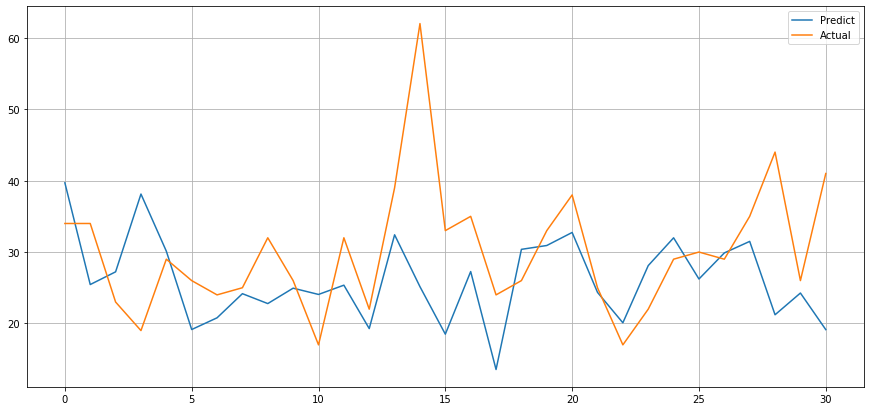

In [42]:
fig = plt.figure(figsize=(15, 7))

plt.plot(y_pred, label='Predict')
plt.plot(y_test, label='Actual')

plt.grid(True)
plt.legend()
plt.show()

---

## Preprocessing Dataset for Multi-Variate

In [16]:
df_train_1.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,La_doña_(telenovela_de_2016)_es.wikipedia.org_all-access_spider,RTS_(canal_de_televisión)_es.wikipedia.org_all-access_spider,La_ley_del_corazón_es.wikipedia.org_all-access_spider,The_Crown_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,10.277992,12.0,19.691892,118.0,5.0,6.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-02,11.0,14.0,0.0,13.0,10.277992,7.0,19.691892,26.0,23.0,3.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-03,5.0,15.0,1.0,10.0,10.277992,4.0,19.691892,30.0,14.0,5.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-04,13.0,18.0,1.0,94.0,10.277992,5.0,19.691892,24.0,12.0,12.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333
2015-07-05,14.0,11.0,0.0,4.0,10.277992,20.0,19.691892,29.0,9.0,6.0,...,17.705882,4.054054,34.836364,18.946429,12.203704,14.142857,6.8,40.4375,7.0,9.333333


In [36]:
df_temp = df_train_1.head()
df_temp = df_temp.iloc[:, :10]

In [37]:
df_temp

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider
Date,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,10.277992,12.0,19.691892,118.0,5.0,6.0
2015-07-02,11.0,14.0,0.0,13.0,10.277992,7.0,19.691892,26.0,23.0,3.0
2015-07-03,5.0,15.0,1.0,10.0,10.277992,4.0,19.691892,30.0,14.0,5.0
2015-07-04,13.0,18.0,1.0,94.0,10.277992,5.0,19.691892,24.0,12.0,12.0
2015-07-05,14.0,11.0,0.0,4.0,10.277992,20.0,19.691892,29.0,9.0,6.0


In [38]:
column_indexes = df_temp.columns

In [39]:
num_time_step = 3

In [47]:
df_temp[column_indexes[0]]["step_1"] = df_temp[column_indexes[0]].shift(1)

Date
2015-07-01 00:00:00                                                  NaN
2015-07-02 00:00:00                                                   18
2015-07-03 00:00:00                                                   11
2015-07-04 00:00:00                                                    5
2015-07-05 00:00:00                                                   13
_1                                                                    14
_2                     Date
2015-07-01     NaN
2015-07-02    18.0
201...
_3                     Date
2015-07-01 00:00:00    NaN
2015-07-02 00:...
step_1                 Date
2015-07-01 00:00:00    NaN
2015-07-02 00:...
Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: object

In [46]:
df_temp

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider
Date,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,10.277992,12.0,19.691892,118.0,5.0,6.0
2015-07-02,11.0,14.0,0.0,13.0,10.277992,7.0,19.691892,26.0,23.0,3.0
2015-07-03,5.0,15.0,1.0,10.0,10.277992,4.0,19.691892,30.0,14.0,5.0
2015-07-04,13.0,18.0,1.0,94.0,10.277992,5.0,19.691892,24.0,12.0,12.0
2015-07-05,14.0,11.0,0.0,4.0,10.277992,20.0,19.691892,29.0,9.0,6.0


In [40]:
for index in column_indexes:
    for time_step in range(num_time_step):
        current_step = time_step + 1
        
        df_temp[index]["_{}".format(current_step)] = df_temp[index].shift(current_step)

In [41]:
df_temp

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider
Date,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,10.277992,12.0,19.691892,118.0,5.0,6.0
2015-07-02,11.0,14.0,0.0,13.0,10.277992,7.0,19.691892,26.0,23.0,3.0
2015-07-03,5.0,15.0,1.0,10.0,10.277992,4.0,19.691892,30.0,14.0,5.0
2015-07-04,13.0,18.0,1.0,94.0,10.277992,5.0,19.691892,24.0,12.0,12.0
2015-07-05,14.0,11.0,0.0,4.0,10.277992,20.0,19.691892,29.0,9.0,6.0


In [26]:
for index in column_indexes:
    for time_step in range(num_time_step):
        current_step = time_step + 1
        
        df_temp[index]["_{}".format(current_step)] = 

pandas.core.indexes.base.Index

In [24]:
df_train_1.iloc[:, 0]

Date
2015-07-01    18.0
2015-07-02    11.0
2015-07-03     5.0
2015-07-04    13.0
2015-07-05    14.0
              ... 
2016-12-27    20.0
2016-12-28    22.0
2016-12-29    19.0
2016-12-30    18.0
2016-12-31    20.0
Name: 2NE1_zh.wikipedia.org_all-access_spider, Length: 550, dtype: float64

## Model

In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [204]:
df_train_1 = df_train_1.T

In [278]:
df_train_1.head()

Date,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18.000000,11.000000,5.000000,13.000000,14.000000,9.000000,9.000000,22.000000,26.000000,24.000000,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
2PM_zh.wikipedia.org_all-access_spider,11.000000,14.000000,15.000000,18.000000,11.000000,13.000000,22.000000,11.000000,10.000000,4.000000,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
3C_zh.wikipedia.org_all-access_spider,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,3.000000,4.000000,4.000000,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
4minute_zh.wikipedia.org_all-access_spider,35.000000,13.000000,10.000000,94.000000,4.000000,26.000000,14.000000,9.000000,11.000000,16.000000,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,10.277992,10.277992,10.277992,10.277992,10.277992,10.277992,10.277992,10.277992,10.277992,10.277992,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [229]:
df_train_1_data = df_train_1.values

In [230]:
size, time_step = df_train_1_data.shape

In [231]:
df_train_1_data = df_train_1_data.reshape(size, time_step, 1)

In [301]:
df_train_1_data.shape

(144411, 550, 1)

In [302]:
TIME_STEP = 550
NUM_FEATURES = df_train_1_data.shape[2]
FORECAST_TIME_STEP = 30
CLIPVALUE=1.0

EVALUATION_INTERVAL = 144411
EPOCHS = 20

In [303]:
model = tf.keras.models.Sequential()

In [304]:
model.add(tf.keras.layers.LSTM(
    16,
#     return_sequences=True,
    input_shape=(None, 1)
))
# model.add(tf.keras.layers.LSTM(
#     8,
#     activation='relu'
# ))
# model.add(tf.keras.layers.Dense(FORECAST_TIME_STEP))

In [305]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(clipvalue=CLIPVALUE),
    loss='mae'
)

In [306]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 16)                1152      
Total params: 1,152
Trainable params: 1,152
Non-trainable params: 0
_________________________________________________________________


In [307]:
model.fit(
    df_train_1_data,
    epochs=EPOCHS
#     steps_per_epoch=EVALUATION_INTERVAL
)

Train on 144411 samples
Epoch 1/20
    32/144411 [..............................] - ETA: 14:05

IndexError: list index out of range

In [ ]:
# class WT_Model(Model):
#     def __init__(self):
#         super(WT_Model, self).__init__()
#         self.lstm_1 = LSTM(
#             16,
#             input_shape=()  # (time_step, features)
#         )